In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [3]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


4 계절 나누기
---

In [9]:
SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

'''
 0 : 봄
 1 : 여름
 2 : 가을
 3 : 겨울
'''
datas = [
    tsDatas[(tsDatas['month'].isin(SEASONS[season]))].copy()
    for season in ["봄", "여름", "가을", "겨울"]
]

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
214,2018-12-01,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,2018,12,01
215,2018-12-02,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,2018,12,02
216,2018-12-03,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,2018,12,03
217,2018-12-04,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,2018,12,04
218,2018-12-05,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.002,0.003,0.002,0.003,2018,12,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2019-02-24,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.047,0.

<AxesSubplot:xlabel='x', ylabel='y'>

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


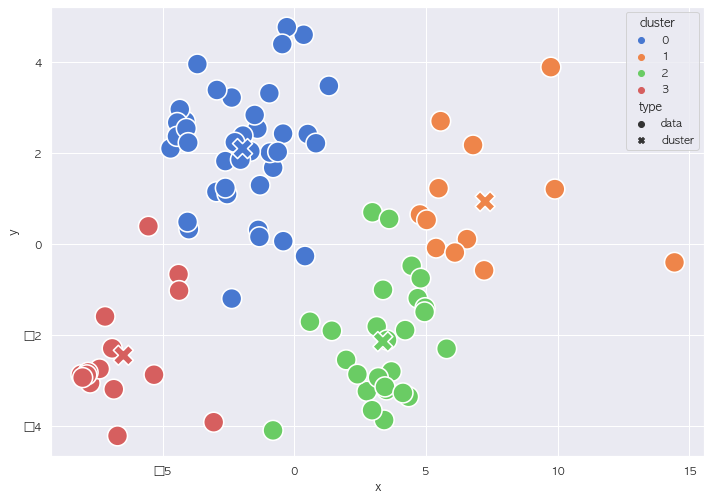

In [24]:
dpp = datas[0][datas[0].columns.difference(['date', 'year', 'month', 'day'])].copy()
dpp = dpp

# Scaler 선택
# STD, MIN, MAX, ROBUST
selScaler = "ROBUST"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas[0]['date']
dpp

pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas[0]['date']
dr

'''
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.show()

elbow(dr)
'''

K = 4

points = dr.values
kmeans = KMeans(n_clusters=K).fit(points)
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['x', 'y'])

clusterNum = [i for i in range(K)]
centers['cluster'] = [i for i in range(len(centers))]
centers['type'] = [f'cluster' for dt in clusterNum]
centers

kmeans.labels_

clustering = dr.copy()
clustering['cluster'] = kmeans.labels_
clustering['type'] = ['data' for i in range(len(clustering['x']))]

result = pd.concat([clustering, centers], axis = 0)

result

sns.scatterplot(x='x', y="y", 
                hue="cluster", 
                style="type",
                palette="muted",
                s=400,
                data=result)

<AxesSubplot:>

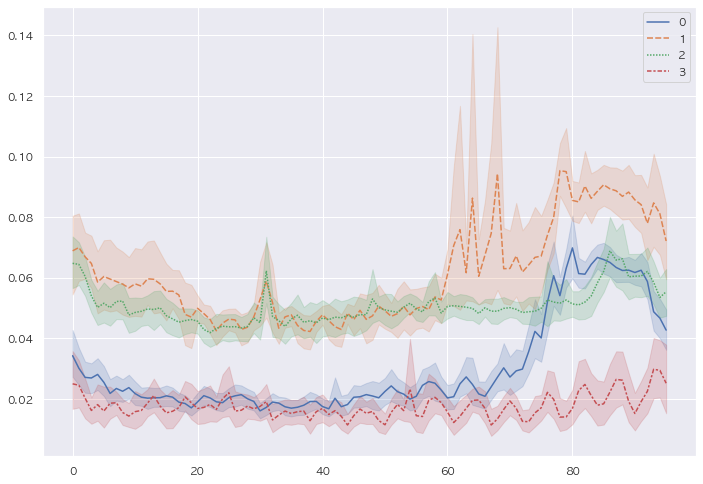

In [25]:
tsCheck = datas[0][datas[0].columns.difference(['year', 'month', 'day'])].copy()
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T
tsCheck
sns.lineplot(data=tsCheck)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

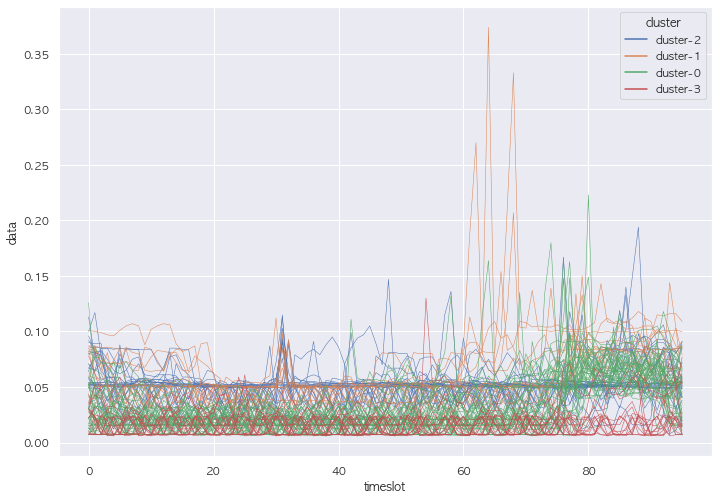

In [26]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

sns.lineplot(data=processingData,
            x="timeslot",
            y="data",
            units="date",
            hue="cluster",
            estimator=None,
            lw=0.5)

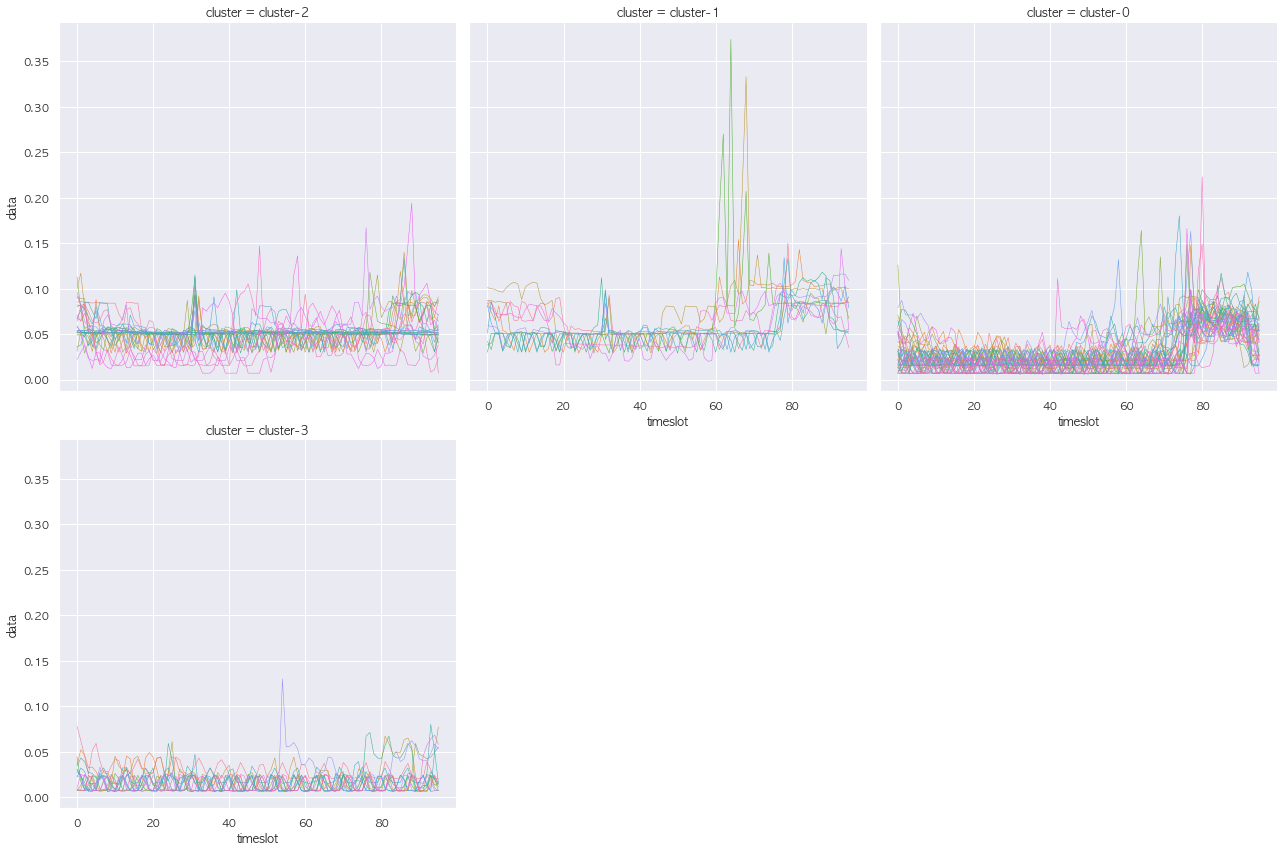

In [27]:
clusterMap = sns.FacetGrid(processingData, col="cluster",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "date",estimator=None, lw=0.5)

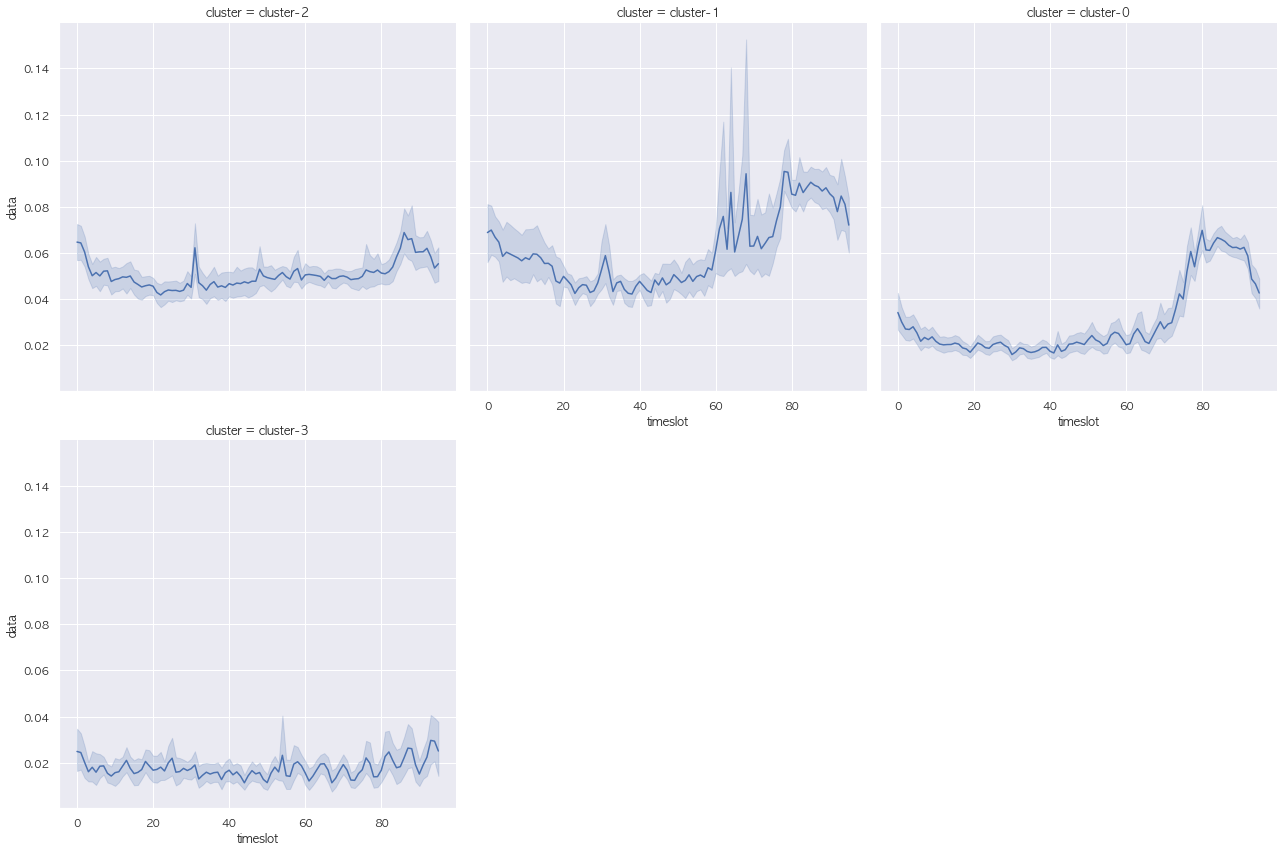

In [28]:
clusterMap = sns.FacetGrid(processingData, col = 'cluster', col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data")

In [52]:
best = pd.DataFrame(processingData.groupby('cluster').size().sort_values(ascending=False)).reset_index()['cluster'][0]
print(f'best is {best}')
processingData[processingData['cluster'] == best].groupby('timeslot').mean()

best is cluster-0


,data
timeslot,
0,0.034154
1,0.030026
2,0.027000
3,0.026795
4,0.027974
...,...
91,0.062410
92,0.058692
93,0.048692
